In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
def CAGR(df):
    temp=df.copy()
    temp['cum_return']=(1+temp['monthly_return']).cumprod()
    year=round(((temp.index[len(temp)-1]-temp.index[0])).days/365)
    CAGR=((temp.cum_return[len(temp)-1]/1)**(1/year))-1
    return round(CAGR*100,3)

In [4]:
def volatility(df):
    temp=df.copy()
    daily_vol=temp.monthly_return.std()
    ann_vol=(daily_vol*(12**0.5))
    return round(ann_vol*100,3)

In [5]:
def sharpe(df,rf=6.2):
    temp=df.copy()
    ratio=(CAGR(df)-rf)/volatility(df)
    return round(ratio,3)

In [6]:
def max_drawdown(df):
    temp=df.copy()
    temp['cum_return']=(1+temp['monthly_return']).cumprod()
    temp['cum_roll_max']=temp['cum_return'].cummax()
    temp['draw_down']=temp['cum_roll_max']-temp['cum_return']
    temp['draw_down_pct']=temp['draw_down']/temp['cum_roll_max']
    max_dd=temp['draw_down_pct'].max()
    return round(max_dd*100,3)

In [7]:
stocks=['INFY.NS','TCS.NS','RELIANCE.NS','ICICIBANK.NS','HDFCBANK.NS','HCLTECH.NS','BHARTIARTL.NS','INDUSINDBK.NS','SBIN.NS',
        'LT.NS','TECHM.NS','AXISBANK.NS','ITC.NS','BAJAJ-AUTO.NS','ONGC.NS','TATASTEEL.BO','NTPC.NS','M&M.NS','ASIANPAINT.NS','POWERGRID.NS',
       'BAJAJFINSV.NS','TITAN.NS','NESTLEIND.NS','ULTRACEMCO.NS','SUNPHARMA.BO','BAJFINANCE.NS','MARUTI.NS','HDFC.NS','HINDUNILVR.NS','KOTAKBANK.NS']

In [8]:
len(stocks)

30

In [9]:
temp=[]
df={}
attempt=5
while attempt>0:
    for stock in stocks:
        if stock not in temp:
            try:
                df[stock]=pd.DataFrame(pdr.get_data_yahoo(stock,dt.date.today()-dt.timedelta(365*5),dt.date.today(),interval='m'))
                df[stock]=df[stock][['High','Low','Open','Adj Close','Volume']]
                df[stock].columns=['High','Low','Open','Close','Volume']
                df[stock].dropna(inplace=True)
                temp.append(stock)
                stocks=[k for k in stocks if k !=stock]           
            except:
                print('Failed to fetch Data for {} .... Retrying!'.format(stock))
                continue
    attempt-=1  
df_=pd.concat(df,axis=1).dropna()
df_.head()

INFY.NS                                                   \
                  High         Low        Open       Close       Volume   
Date                                                                      
2016-09-30  541.349976  496.575012  517.750000  435.381683  119388948.0   
2016-10-31  503.399994  450.500000  503.399994  430.367798  166172762.0   
2016-11-30  511.000000  479.000000  488.000000  445.830231  124829654.0   
2016-12-31  520.000000  450.575012  505.549988  409.655670  229338128.0   
2017-01-31  515.500000  452.575012  460.549988  446.624298  165933242.0   

                 TCS.NS                                                     \
                   High          Low         Open        Close      Volume   
Date                                                                         
2016-09-30  1228.824951  1145.500000  1225.000000  1088.298828  41500766.0   
2016-10-31  1199.849976  1025.949951  1199.849976  1035.423462  54418020.0   
2016-11-30  1189.300049  1072.824951  1138.500000  1076.138672  41661230.0   
2016-12-31  1194.974976  1100.025024  1183.300049  1014.383301  59700074.0   
2017-01-31  1277.500000  1076.500000  1110.000000  1125.149292  67284244.0   

            ... HINDUNILVR.NS                                             \
            ...          High         Low   Open       Close      Volume   
Date        ...                                                            
2016-09-30  ...    889.700012  818.400024  878.0  776.714050  28309572.0   
2016-10-31  ...    866.400024  783.250000  835.0  783.677917  30211072.0   
2016-11-30  ...    855.700012  781.950012  844.0  773.764404  16214478.0   
2016-12-31  ...    875.950012  816.549988  828.0  800.965942  20656698.0   
2017-01-31  ...    872.000000  837.500000  857.0  810.797668  21550956.0   

           KOTAKBANK.NS                                                  
                   High         Low        Open       Close      Volume  
Date                                                                     
2016-09-30   822.000000  764.000000  788.950012  817.572632  28002925.0  
2016-10-31   833.450012  736.200012  819.900024  753.811218  42365163.0  
2016-11-30   756.450012  704.099976  755.000000  718.138733  26148343.0  
2016-12-31   802.099976  692.500000  720.000000  772.470703  44099173.0  
2017-01-31   814.400024  739.150024  777.500000  800.359985  40821525.0  

[5 rows x 150 columns]

In [10]:
stocks=temp
stocks,len(stocks)

(['INFY.NS',
  'TCS.NS',
  'RELIANCE.NS',
  'ICICIBANK.NS',
  'HDFCBANK.NS',
  'HCLTECH.NS',
  'BHARTIARTL.NS',
  'INDUSINDBK.NS',
  'SBIN.NS',
  'LT.NS',
  'TECHM.NS',
  'AXISBANK.NS',
  'ITC.NS',
  'BAJAJ-AUTO.NS',
  'ONGC.NS',
  'TATASTEEL.BO',
  'NTPC.NS',
  'M&M.NS',
  'ASIANPAINT.NS',
  'POWERGRID.NS',
  'BAJAJFINSV.NS',
  'TITAN.NS',
  'NESTLEIND.NS',
  'ULTRACEMCO.NS',
  'SUNPHARMA.BO',
  'BAJFINANCE.NS',
  'MARUTI.NS',
  'HDFC.NS',
  'HINDUNILVR.NS',
  'KOTAKBANK.NS'],
 30)

In [11]:
sensex_df=pdr.get_data_yahoo('^BSESN',dt.date.today()-dt.timedelta(365*5),dt.date.today(),interval='m')
sensex_df=sensex_df[['High','Low','Open','Adj Close','Volume']]
sensex_df.columns=['High','Low','Open','Close','Volume']

In [12]:
sensex_df['monthly_return']=sensex_df['Close'].pct_change()
sensex_df

,High,Low,Open,Close,Volume,monthly_return
Date,,,,,,
2016-09-30,28477.650391,27488.300781,27997.289062,27941.509766,228500,NaN
2016-10-31,28029.800781,25717.929688,27966.179688,26652.810547,261000,-0.046121
2016-11-30,26803.759766,25753.740234,26756.660156,26626.460938,189300,-0.000989
2016-12-31,27980.390625,26447.060547,26711.150391,27655.960938,201400,0.038665
2017-01-31,29065.310547,27590.099609,27669.080078,28743.320312,240100,0.039317
...,...,...,...,...,...,...
2021-05-31,53126.730469,51450.578125,52067.511719,52482.710938,260100,0.010499
2021-06-30,53290.808594,51802.730469,52638.500000,52586.839844,210600,0.001984
2021-07-31,57625.261719,52804.078125,52901.281250,57552.390625,191500,0.094426


In [13]:
CAGR(sensex_df),volatility(sensex_df),sharpe(sensex_df),max_drawdown(sensex_df)

(16.385, 18.821, 0.541, 28.568)

In [14]:
df0=df_.copy()
return_df=pd.DataFrame()

In [15]:
for stock in stocks:
    print('Calculating Returns for ',stock)
    return_df[stock]=df0[stock].Close.pct_change()

Calculating Returns for  INFY.NS
Calculating Returns for  TCS.NS
Calculating Returns for  RELIANCE.NS
Calculating Returns for  ICICIBANK.NS
Calculating Returns for  HDFCBANK.NS
Calculating Returns for  HCLTECH.NS
Calculating Returns for  BHARTIARTL.NS
Calculating Returns for  INDUSINDBK.NS
Calculating Returns for  SBIN.NS
Calculating Returns for  LT.NS
Calculating Returns for  TECHM.NS
Calculating Returns for  AXISBANK.NS
Calculating Returns for  ITC.NS
Calculating Returns for  BAJAJ-AUTO.NS
Calculating Returns for  ONGC.NS
Calculating Returns for  TATASTEEL.BO
Calculating Returns for  NTPC.NS
Calculating Returns for  M&M.NS
Calculating Returns for  ASIANPAINT.NS
Calculating Returns for  POWERGRID.NS
Calculating Returns for  BAJAJFINSV.NS
Calculating Returns for  TITAN.NS
Calculating Returns for  NESTLEIND.NS
Calculating Returns for  ULTRACEMCO.NS
Calculating Returns for  SUNPHARMA.BO
Calculating Returns for  BAJFINANCE.NS
Calculating Returns for  MARUTI.NS
Calculating Returns for  HDF

In [16]:
return_df.dropna(inplace=True)

In [17]:
return_df.head()

,INFY.NS,TCS.NS,RELIANCE.NS,ICICIBANK.NS,HDFCBANK.NS,HCLTECH.NS,BHARTIARTL.NS,INDUSINDBK.NS,SBIN.NS,LT.NS,...,BAJAJFINSV.NS,TITAN.NS,NESTLEIND.NS,ULTRACEMCO.NS,SUNPHARMA.BO,BAJFINANCE.NS,MARUTI.NS,HDFC.NS,HINDUNILVR.NS,KOTAKBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-31,-0.011516,-0.048585,-0.061520,-0.040816,-0.047218,0.061318,0.018034,-0.094307,0.001357,-0.066151,...,-0.116221,-0.133985,-0.099638,-0.095224,-0.044975,-0.142418,-0.103835,-0.092405,0.008966,-0.077989
2016-11-30,0.035928,0.039322,0.093278,-0.038599,0.005502,0.030045,-0.058380,0.019555,-0.031546,-0.024335,...,-0.031823,0.010201,-0.041552,-0.098031,-0.113403,-0.084366,0.010169,-0.000396,-0.012650,-0.047323
2016-12-31,-0.081140,-0.057386,-0.034368,0.053467,0.066697,-0.020291,0.139212,0.130111,0.040568,0.072011,...,0.121250,0.107864,-0.026818,0.136684,0.002858,0.231180,0.108035,0.081776,0.035155,0.075657
2017-01-31,0.090243,0.109195,0.184510,0.027514,0.080402,0.035690,0.048679,0.048361,0.033993,0.015869,...,0.205894,0.207568,0.068765,0.021681,0.075054,0.068762,0.004793,0.003075,0.012275,0.036104
2017-02-28,0.009729,-0.013968,0.066920,0.001809,0.037731,0.049004,-0.041353,0.085746,0.089896,0.071944,...,0.047073,0.058440,0.068178,0.055689,0.012888,0.056759,0.015737,0.096383,0.052951,0.087396


In [18]:
def portfolio(df,n,x,k=0):
    '''return cummulitive portfolio returns
    df = datframe with monthly return of all stock
    n = number of stock in the portfolio
    x = number of underperforming stock to be removed from the portfolio every month'''
    temp=df.copy()
    pf=df.iloc[0,:].sort_values(ascending=False)[:n].index.values.tolist() #portfolio
    monthly_return=[]
    for i in range(len(temp)):
        if len(pf)>0:
            monthly_return.append(temp[pf].iloc[i,:].mean())
            bad_stock = temp[pf].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            pf=[t for t in pf if t not in bad_stock]
        fill= n-len(pf)
        new_picks=temp[[t for t in stocks if t not in pf]].iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        #new_picks=temp.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist() # To Allow Duplicate Stock In Portfolio 
        pf=pf+new_picks
        if k==1:
            print("Portfolio for {}".format(str(temp.index[i]))[:-12],":",pf)
    monthly_return_df=pd.DataFrame(np.array(monthly_return),columns=['monthly_return'],index=temp.index)
    return monthly_return_df

In [19]:
portfolio(return_df,6,3)

,monthly_return
Date,
2016-10-31,0.063601
2016-11-30,-0.018692
2016-12-31,-0.012151
2017-01-31,0.026378
2017-02-28,0.031306
2017-03-31,0.034909
2017-04-30,0.016552
2017-05-31,0.015443
2017-06-30,0.042401


In [20]:
CAGR(portfolio(return_df,6,2)),volatility(portfolio(return_df,6,2)),sharpe(portfolio(return_df,6,2)),max_drawdown(portfolio(return_df,6,2))

(19.363, 18.93, 0.695, 32.656)

In [21]:
CAGR(sensex_df),volatility(sensex_df),sharpe(sensex_df),max_drawdown(sensex_df)

(16.385, 18.821, 0.541, 28.568)

In [22]:
import matplotlib.pyplot as plt

Portfolio for 2016-10 : ['TECHM.NS', 'POWERGRID.NS', 'NTPC.NS', 'HCLTECH.NS', 'TATASTEEL.BO', 'BHARTIARTL.NS']
Portfolio for 2016-11 : ['TECHM.NS', 'POWERGRID.NS', 'NTPC.NS', 'HCLTECH.NS', 'RELIANCE.NS', 'ITC.NS']
Portfolio for 2016-12 : ['POWERGRID.NS', 'NTPC.NS', 'HCLTECH.NS', 'ITC.NS', 'BAJFINANCE.NS', 'TATASTEEL.BO']
Portfolio for 2017-01 : ['HCLTECH.NS', 'ITC.NS', 'BAJFINANCE.NS', 'TATASTEEL.BO', 'TITAN.NS', 'BAJAJFINSV.NS']
Portfolio for 2017-02 : ['HCLTECH.NS', 'ITC.NS', 'BAJFINANCE.NS', 'TITAN.NS', 'HDFC.NS', 'SBIN.NS']
Portfolio for 2017-03 : ['ITC.NS', 'BAJFINANCE.NS', 'TITAN.NS', 'HDFC.NS', 'BAJAJFINSV.NS', 'LT.NS']
Portfolio for 2017-04 : ['ITC.NS', 'BAJFINANCE.NS', 'TITAN.NS', 'HDFC.NS', 'ICICIBANK.NS', 'HINDUNILVR.NS']
Portfolio for 2017-05 : ['ITC.NS', 'BAJFINANCE.NS', 'TITAN.NS', 'HDFC.NS', 'SUNPHARMA.BO', 'TATASTEEL.BO']
Portfolio for 2017-06 : ['BAJFINANCE.NS', 'TITAN.NS', 'HDFC.NS', 'TATASTEEL.BO', 'BAJAJFINSV.NS', 'RELIANCE.NS']
Portfolio for 2017-07 : ['BAJFINANCE.

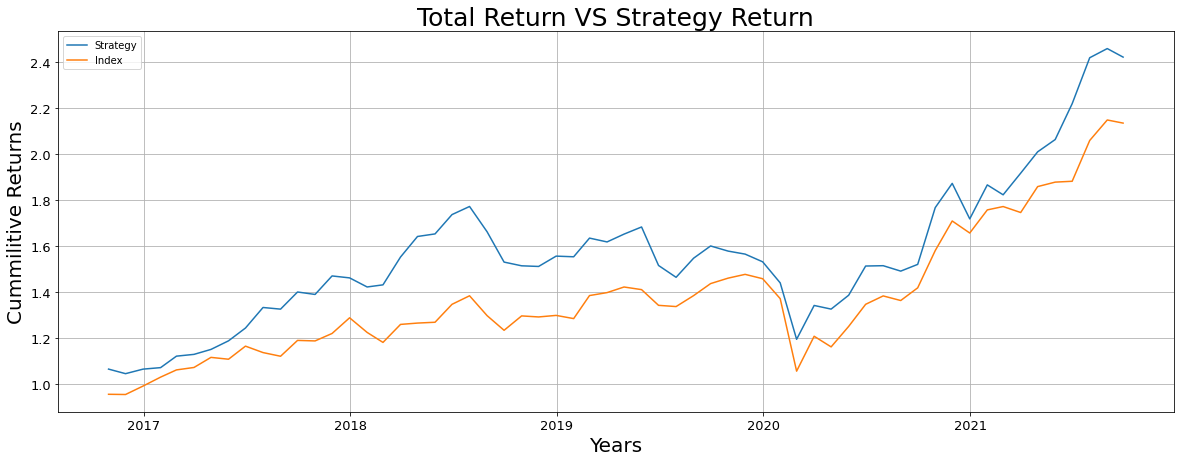

In [23]:
plt.figure(figsize=[20,7])
plt.plot((1+portfolio(return_df,6,2,1)).cumprod(),label='Strategy')
plt.plot((1+sensex_df.monthly_return).cumprod(),label='Index')
plt.title('Total Return VS Strategy Return',size=25)
plt.xlabel('Years',size=20)
plt.legend()
plt.xticks(size=13)
plt.yticks(size=13)
plt.grid()
plt.ylabel('Cummilitive Returns',size=20)
plt.show()